In [1]:
%matplotlib inline
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder,StandardScaler
import sklearn.metrics as metrics
from sklearn import preprocessing

In [2]:
df_movies = pd.read_csv('/Users/raphsmart/Desktop/EPITA/2ndSemester/Recommender_System/archive/movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df_movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [4]:
df_movies.shape

(9742, 3)

In [5]:
df_movies.dtypes.value_counts()

object    2
int64     1
dtype: int64

In [6]:
# Check for missing columns in movies columns
df_movies.isnull().sum().sort_values(ascending=False)

movieId    0
title      0
genres     0
dtype: int64

In [7]:
df_movies["title"].unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       ..., 'Flint (2017)', 'Bungo Stray Dogs: Dead Apple (2018)',
       'Andrew Dice Clay: Dice Rules (1991)'], dtype=object)

In [8]:
# join similar movies with different Ids
movies_duplicates = df_movies[df_movies["title"].duplicated(keep=False)]
movies_duplicates

,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


In [9]:
movies_duplicates.sort_values(by="title")

,movieId,title,genres
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
650,838,Emma (1996),Comedy|Drama|Romance
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
9135,147002,Eros (2004),Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi


In [10]:
df_ratings = pd.read_csv('//Users/raphsmart/Desktop/EPITA/2ndSemester/Recommender_System/archive/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [11]:
# Check for missing columns in ratins columns
df_ratings.isnull().sum().sort_values(ascending=False)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

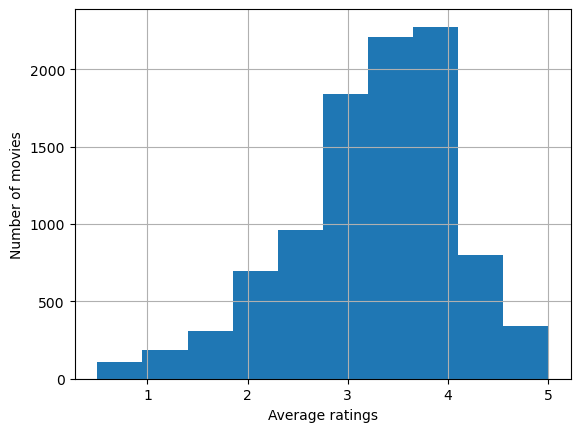

In [12]:
plt.figure()
df_ratings.groupby('movieId').mean()['rating'].hist()

plt.xlabel('Average ratings')
plt.ylabel('Number of movies')
plt.show()

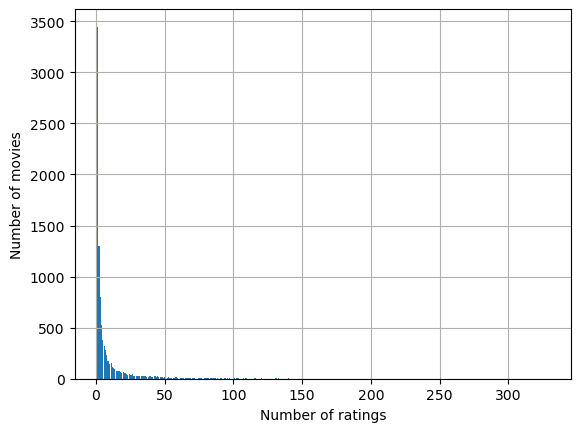

In [13]:
plt.figure()
df_ratings.groupby('movieId').count()['rating'].hist(bins=400)

plt.xlabel('Number of ratings')
plt.ylabel('Number of movies')
plt.show()

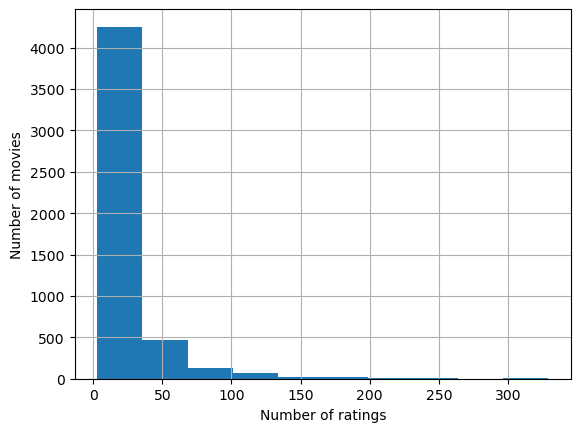

In [32]:
plt.figure()

sort = df_ratings.groupby('movieId').filter(lambda c: len(c) >= 3)
sort.groupby('movieId').count()['rating'].hist()

plt.xlabel('Number of ratings')
plt.ylabel('Number of movies')
plt.show()

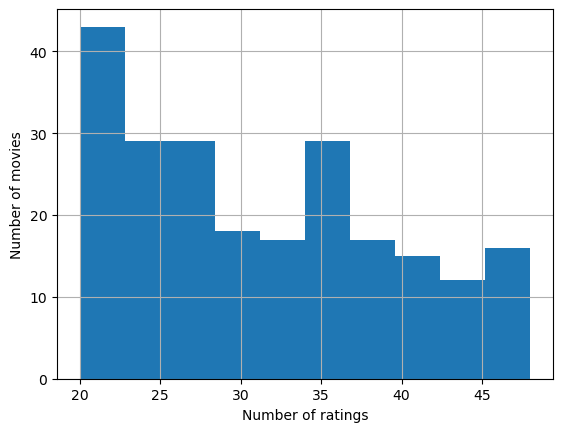

In [33]:
plt.figure()
sort = df_ratings.groupby('movieId').count()['rating']
sort = filterd[filterd < 50]
sort.hist()

plt.xlabel('Number of ratings')
plt.ylabel('Number of movies')
plt.show()

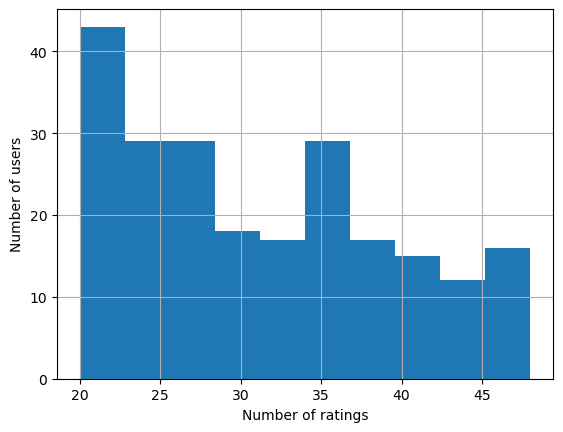

In [34]:
plt.figure()
sort = df_ratings.groupby('userId').count()['rating']
sort = filterd[filterd < 50]
sort.hist()

plt.xlabel('Number of ratings')
plt.ylabel('Number of users')
plt.show()

In [37]:
sort = df_ratings.groupby('movieId').filter(lambda c: len(c) >= 10)
print(filtered.shape)
sort.groupby('movieId').count().sort_values('rating', ascending=False)

(81116, 4)


,userId,rating
movieId,,
356,329,329
318,317,317
296,307,307
593,279,279
2571,278,278
...,...,...
5329,10,10
5296,10,10
68793,10,10


In [61]:
# keeping timestamp column 
Timestamp = df_ratings['timestamp']
Timestamp.head()

In [62]:
df_ratings.drop(['timestamp'], axis = 1, inplace = True)

In [40]:
df_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [41]:
ratings_duplicate = df_ratings[df_ratings.duplicated(keep=False,subset=["userId","movieId"])]
ratings_duplicate

,userId,movieId,rating


Text(0, 0.5, 'Number of ratings')

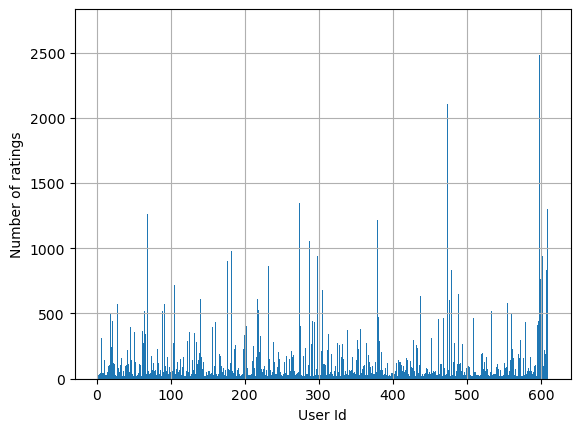

In [42]:
df_ratings['userId'].hist(bins=610)
plt.xlabel('User Id')
plt.ylabel('Number of ratings')

<AxesSubplot:>

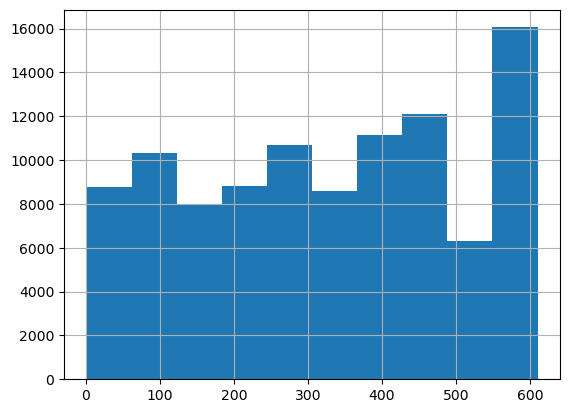

In [43]:
df_ratings['userId'].hist()

<AxesSubplot:>

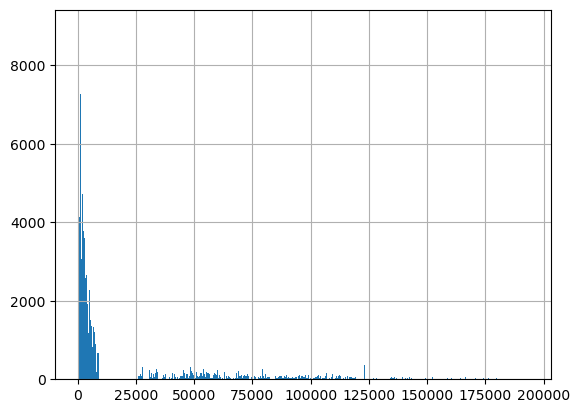

In [44]:
df_ratings['movieId'].hist(bins=610)

<AxesSubplot:>

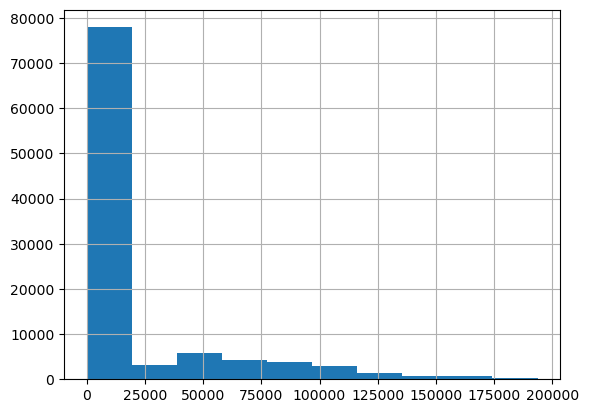

In [45]:
df_ratings['movieId'].hist()

In [26]:
def get_year(title):
    title = title.strip()
    if(title[-6] != '('):
        return None
    return title[-5:-1]

df_movies['year'] = df_movies.title.apply(get_year)

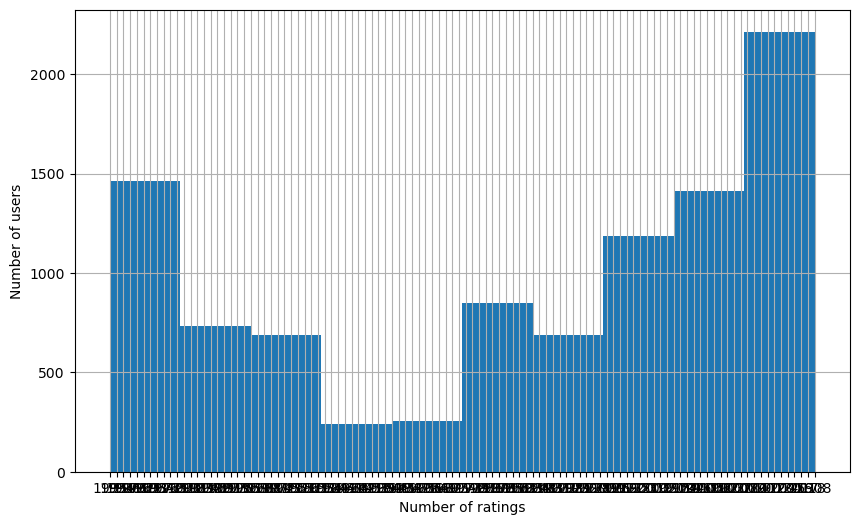

In [46]:
plt.figure(figsize=(10, 6))
df_movies['year'].hist()

plt.xlabel('Number of ratings')
plt.ylabel('Number of users')
plt.show()

<AxesSubplot:>

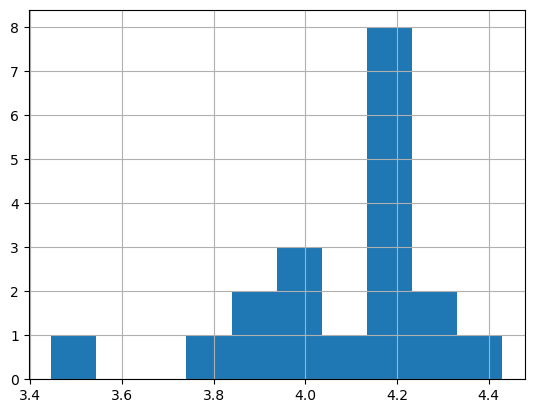

In [48]:
many_ratings = sort.groupby('movieId').filter(lambda c: len(c) >= 200)
many_ratings.groupby('movieId').mean()['rating'].hist()

In [49]:
def x(c):
    print(c)
    
g = df_ratings.groupby(['rating', 'userId']).agg({'rating': 'count'})
g.groupby('userId').filter(lambda x: len(x) <= 2).sort_values('userId')

,,rating
rating,userId,
4.0,49,10
4.5,49,11
5.0,53,20
3.0,404,36
4.0,404,24
3.0,609,27
4.0,609,10
